# Stata, Jupyter, and Reproducible Research

From [Wikipedia](https://en.wikipedia.org/wiki/Reproducibility#Reproducible_research), reproducible research is defined as:

>The term reproducible research refers to the idea that the ultimate product of
academic research is the paper **along with** the full computational
environment used to produce the results in the paper such as the code, data,
etc. that can be used to reproduce the results and create new work based on the
research.

The reproducible research movement (especially for the statistical sciences)
takes this a step further by advocating for dynamic documents. The idea is
that a researcher should provide a file (the dynamic document) that can execute
the statistical analysis, generate figures, and contains accompanying text
narrative.  This file can be executed to produce the **academic paper**.  The
researcher shares this file with other researchers rather than the only the
paper.  It is my view that within 20 years nearly every scientific journal in
applied statistics will require this approach.

This document shows how to use [jupyter](https://jupyter.org/)
`notebook` or `lab` and markdown syntax for reproducible research and
dynamic documents for work in stata.  The idea behind `jupyter` is
that you share your research by sharing your `ipynb` notebook file.
This file performs the full suite of statistical analysis and can
produce the pdf manuscript describing your analysis.  You will use
this workflow for all class problem set assignments.

For every problem set, you will turn in the jupyter notebook `ipynb`
(similar to a do file) file containing all commands, descriptive text,
and embedded handwritten responses that produces your problem set.

## Getting Started

1. Follow the instructions in the Word document supplied by IT (`Using an Assigned Workspaces Desktop.docx`)  for how to get going with virtual desktops via Amazon Workspaces. This document should be sent to you via email, but I have also added it under the [Introduction Section](https://classroom.google.com/u/0/w/NTI2NDQxNzU5NDc3/t/all) of the course website. 
2. In the virtual desktop, make Microsoft Edge or Firefox your default web browser
3. Next, we need to do a few "housekeeping" items to make things work smoothly in our Anaconda Python environment.
   - Open an "Anaconda Prompt" from "Start" -> "Computer Science" -> "Anaconda"
   - At this command prompt type in the following and press enter for each step:
     - Create an anaconda environment for this class: `conda create -n econ407 -c conda-forge jupyter ipython jupyterlab nodejs`
     - Activate the course environment: `conda activate econ407`  
     - Install pystata-kernel:
       - `pip install pystata-kernel`
       - `python -m pystata-kernel.install`
     - Activate Stata syntax highlighting in jupyter: =jupyter labextension install jupyterlab-stata-highlight=
     - Using `NotePad++` edit `D:\UserProfile\YOURUSERNAME\.pystata-kernel.conf` so it looks like this (=YOURUSERNAME= is your campus login name):
       ```
       [pystata-kernel]
       stata_dir = \\Apps2.campus.wm.edu\apps\Stata\17\
       edition = se
       graph_format = png
       echo = False
       splash = False
       ```
4. Your Stata session using jupyter should be ready to use. To launch it, back at the "Anaconda Prompt"
   - issue `H:\` to move into your H drive for saving your work
   - issue `jupyter lab` to start jupyter lab, you should see this:
   ![](https://econ.pages.code.wm.edu/407/syllabus/_images/stata-jupyter-pystata.png)
   Note:
   - Make sure you see the "Stata" items as the screenshot shows above
   - If you click on the folder icon on the left, the files listed in the left hand panel should be from your H Drive 
   - See Point 7!!!!
5. Click on "Notebook" -> "Stata" to create a new Stata Notebook.
6. You can issue Stata commands as I demonstrate in class. E.g.:
   - `sysuse auto`
   - `sum`
   - `hist price`
7. Never close the Anaconda Prompt window.  You can minimize it, but closing it will require you to repeat these steps from 3 above:
     - Open the "Anaconda Prompt", and issue the following commands:
     - Activate the class python session: `conda activate econ407`
     - Ensure you are working in your H: drive: `H:` 
     - Open jupyter lab: `jupyter lab`

## Some Features of Markdown in Jupyter

Jupyter allows for most features of
[Markdown](https://daringfireball.net/projects/markdown/syntax), which
is a liteweight and readable **text-based** language that allows files
to be easily converted to nice looking pdf, html, or even word
documents. Some features you will likely want to use:

* Equations and Math Notation using latex math
* Headers
* Emphasizing text (bold and italics)
* Numeric and bulletted lists
* Turning stata output on and off
* Adding page breaks for `pdf` output using `\pagebreak` anywhere in a markdown code cell

## A simple example analysis using Markdown syntax

Below we'll be modeling the following regression equation for cars
back in the day:

$$
price_i = \beta_0 + \beta_1 mpg_i + \beta_2 foreign_i + \epsilon_i
$$

\pagebreak
### Load Data and Summarize

If you are using campus computers, initiate your `Stata` session in
`jupyter` using this python code cell:

At this point you are free to execute stata commands interactively in
your notebook.  If you encounter any problems, open an issue at the
[issue-tracker](https://code.wm.edu/econ/407/issue-tracker).

Summarizing the data shows the variables we can consider in our
analysis using a `Stata` code cell:

In [1]:
sysuse auto
sum


. sysuse auto
(1978 automobile data)

. sum

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        make |          0
       price |         74    6165.257    2949.496       3291      15906
         mpg |         74     21.2973    5.785503         12         41
       rep78 |         69    3.405797    .9899323          1          5
    headroom |         74    2.993243    .8459948        1.5          5
-------------+---------------------------------------------------------
       trunk |         74    13.75676    4.277404          5         23
      weight |         74    3019.459    777.1936       1760       4840
      length |         74    187.9324    22.26634        142        233
        turn |         74    39.64865    4.399354         31         51
displacement |         74    197.2973    91.83722         79        425
-------------+--------------------------------------------------

We might also want to look at histograms of our dependent variable, `price`:

(bin=8, start=3291, width=1576.875)


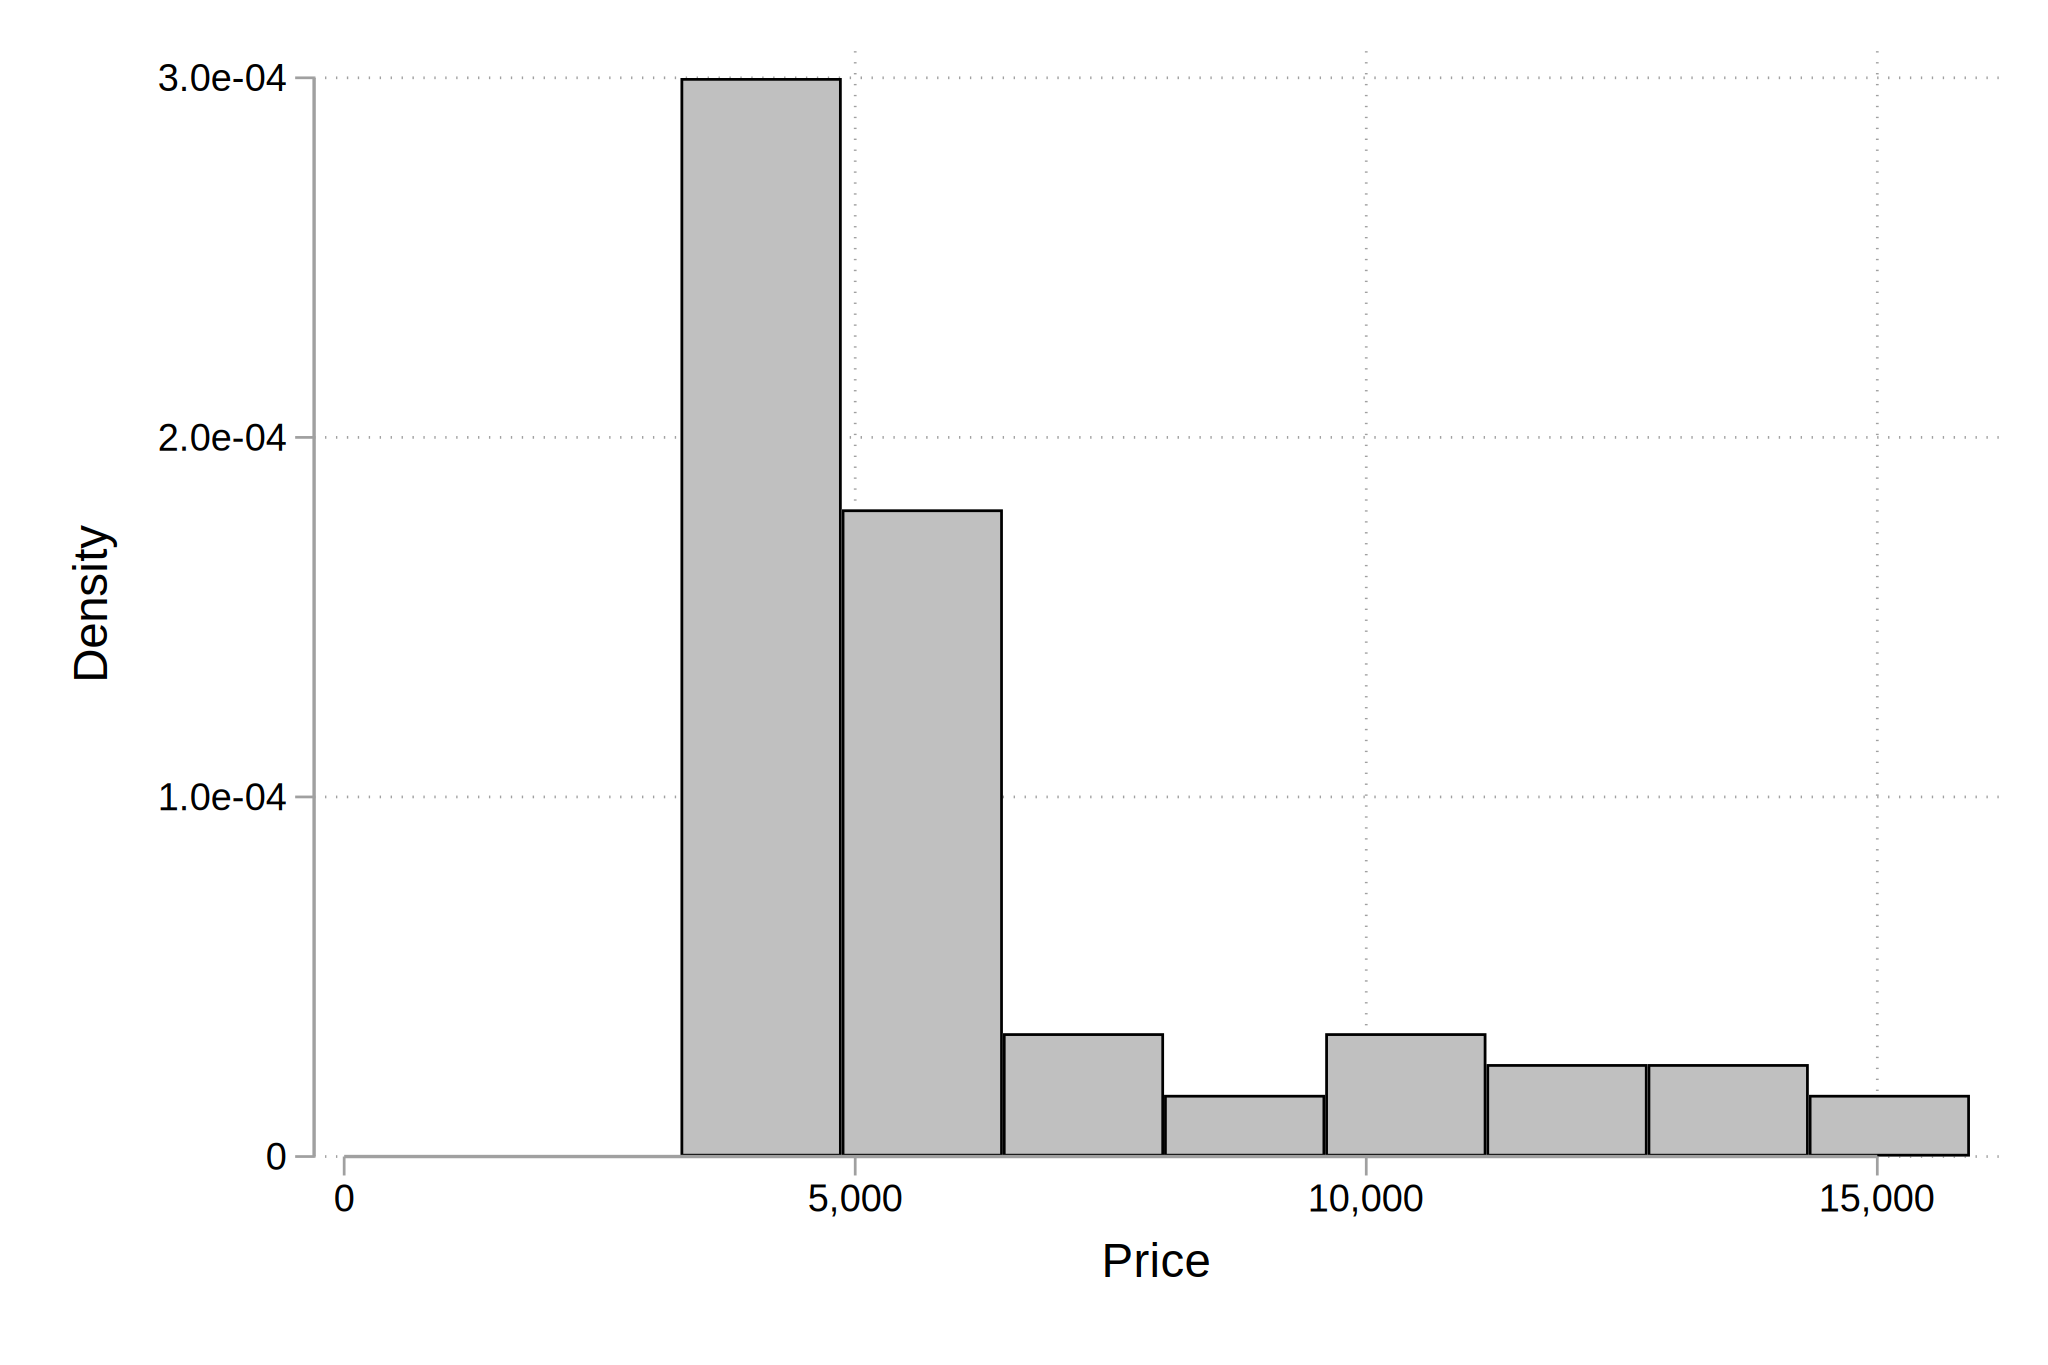

In [2]:
hist price

\pagebreak

## Regression Model

Here are the regression results:

In [3]:
reg price mpg foreign


      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(2, 71)        =     14.07
       Model |   180261702         2  90130850.8   Prob > F        =    0.0000
    Residual |   454803695        71  6405685.84   R-squared       =    0.2838
-------------+----------------------------------   Adj R-squared   =    0.2637
       Total |   635065396        73  8699525.97   Root MSE        =    2530.9

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         mpg |  -294.1955   55.69172    -5.28   0.000    -405.2417   -183.1494
     foreign |   1767.292    700.158     2.52   0.014     371.2169    3163.368
       _cons |   11905.42   1158.634    10.28   0.000     9595.164    14215.67
--------------------------------------------------

## Discussion of Results

We can now proceed to describe our results and add narrative to the
document: Looks like back in the day, foreign cars sell for more!

## Jupyter and Mata

Mata is the matrix algebra environment in stata.  It operates exactly as a Stata code block by wrapping code with `mata` and `end`:

Define $\mathbf{A}_{2 \times 2}$ as

$$
\mathbf{A}=\begin{bmatrix} 1 & 2 \\
                           3 & 4 \end{bmatrix}
$$

In [12]:
mata
A = (1,2\3,4)
A
end


. mata
------------------------------------------------- mata (type end to exit) -----
: A = (1,2\3,4)

: A
       1   2
    +---------+
  1 |  1   2  |
  2 |  3   4  |
    +---------+

: end
-------------------------------------------------------------------------------

. 


## Producing pdf's from your notebook

It is possible to export your notebook in a variety of formats
including pdf.  To do this click on the download link in the top
corner of this page and choose `pdf`.  To create a `pdf` from your
notebook, click on `File` -> `Export Notebook as ...` and choose
`pdf`.  This may require additional configuration steps and are not
required for this course.

## A reproducible version of this notebook

Due to some technical issues related to Stata not being open source
and available when producing this website, you need to use [this ipynb
notebook](https://econ.pages.wm.edu/econ/407/syllabus/_static/reproducible_research.ipynb)[^fn1] if you want to run this document on
a campus lab computer to fully replicate these results.
   
[^1]: Rather than the one you can download using the download link above.